In [1]:
import pickle

# Carregando a variável do arquivo
with open('/kaggle/input/pre-processamentoa/imagens_redimensionadas.pkl', 'rb') as arquivo:
    X = pickle.load(arquivo)

with open('/kaggle/input/pre-processamentoa/y_orig_mod.pkl', 'rb') as arquivo:
    Y = pickle.load(arquivo)

In [2]:
import numpy as np

unique, counts = np.unique(Y, return_counts=True)
ocorrencias = dict(zip(unique, counts))

print(ocorrencias)

{0: 7866, 1: 2081}


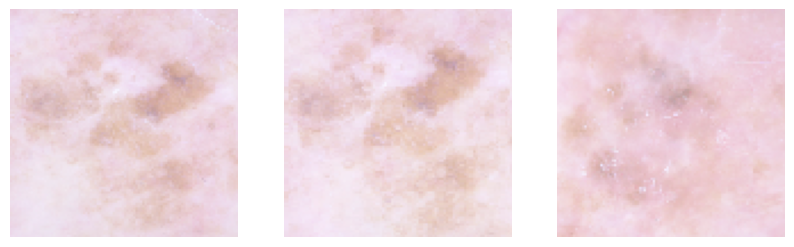

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
for i in range(3):
    ax = plt.subplot(1, 3, i+1)
    img = ((X[i]/255) + 1) / 2
    plt.imshow(img)
    plt.axis('off')
plt.show()

In [4]:
X = np.array(X)

In [5]:
print(np.min(X))
print(np.max(X))
X.shape

0
255


(9947, 100, 100, 3)

In [7]:
import numpy as np
import cv2

def aplicar_filtro_gaussiano(imagens, tamanho_kernel=(3, 3), sigma=0):
   
    # Cria um array vazio com o mesmo formato das imagens de entrada para armazenar as imagens transformadas
    imagens_transformadas = np.zeros_like(imagens)
    
    # Itera sobre cada imagem no array de entrada
    for i in range(len(imagens)):
        # Aplica o filtro Gaussiano na imagem atual
        filtrada = cv2.GaussianBlur(imagens[i], tamanho_kernel, sigma)
        
        # Armazena a imagem filtrada no array de imagens transformadas
        imagens_transformadas[i] = filtrada
    
    return imagens_transformadas

In [12]:
X = aplicar_filtro_gaussiano(X)

In [13]:
print(np.min(X))
print(np.max(X))
X.shape

0
255


(9947, 100, 100, 3)

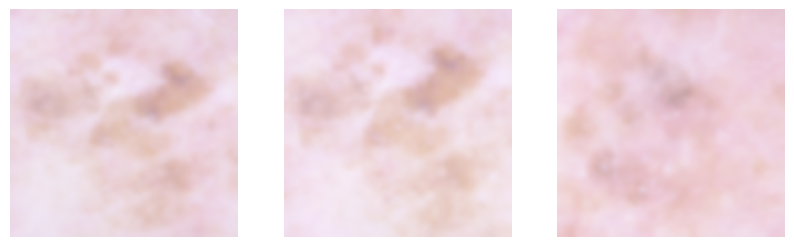

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
for i in range(3):
    ax = plt.subplot(1, 3, i+1)
    img = ((X[i]/255) + 1) / 2
    plt.imshow(img)
    plt.axis('off')
plt.show()

In [15]:
from tensorflow.keras.applications.inception_v3 import preprocess_input
X = preprocess_input(X)

2024-08-03 15:14:26.814977: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-03 15:14:26.815078: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-03 15:14:26.954336: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [16]:
print(np.min(X))
print(np.max(X))
X.shape

-1.0
1.0


(9947, 100, 100, 3)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [18]:
import numpy as np

unique, counts = np.unique(Y_train, return_counts=True)
ocorrencias = dict(zip(unique, counts))
print("Distribuição no conjunto de treino")
print(ocorrencias)

unique, counts = np.unique(Y_test, return_counts=True)
ocorrencias = dict(zip(unique, counts))

print("Distribuição no conjunto de teste")
print(ocorrencias)

Distribuição no conjunto de treino
{0: 6304, 1: 1653}
Distribuição no conjunto de teste
{0: 1562, 1: 428}


In [19]:
'''import os
import cv2
import albumentations as A
from skimage.io import imread, imsave
from pathlib import Path

# transformações
import albumentations as A

transformacoes = A.Compose([
    A.ShiftScaleRotate(shift_limit=0.2, scale_limit=0.2, rotate_limit=40, p=1),
    A.HorizontalFlip(p=0.5),
])



novas = 10

index = 0
labels = []
x_train = []

for arquivo in X_train:
    imagem = arquivo
    holder = Y_train[index]
    index += 1
    for i in range(novas):
        imagem_transformada = transformacoes(image=imagem)['image']
        labels.append(holder)
        x_train.append(imagem_transformada)
        
import numpy as np


X_train = np.array(x_train)  
Y_train = np.array(labels)  
'''
import numpy as np
import albumentations as A

# Transformações
transformacoes = A.Compose([
    A.Rotate(limit=20),
    A.ShiftScaleRotate(shift_limit=0.2, scale_limit=0.2, rotate_limit=0),
    A.HorizontalFlip(),
    A.RandomScale(scale_limit=0.1),
    A.Resize(width=100, height=100, p=1),  # Garante que todas as imagens tenham o mesmo tamanho
])

novas = 4
labels = []
x_train = []

for index, imagem in enumerate(X_train):
    holder = Y_train[index]
    
    # Redimensionar a imagem original para garantir uniformidade
    imagem_resized = transformacoes(image=imagem)['image']
    
    if Y_train[index] == 0:
        labels.append(holder)
        x_train.append(imagem_resized)
    else:
        for i in range(novas):
            imagem_transformada = transformacoes(image=imagem)['image']
            labels.append(holder)
            x_train.append(imagem_transformada)

# Convertendo as listas para arrays NumPy
X_train = np.stack(x_train)  # Usa np.stack para garantir que as imagens sejam empilhadas corretamente
Y_train = np.array(labels)  # Convertendo para NumPy array


In [20]:
import numpy as np

unique, counts = np.unique(Y_train, return_counts=True)
ocorrencias = dict(zip(unique, counts))
print("Distribuição no conjunto de treino")
print(ocorrencias)

unique, counts = np.unique(Y_test, return_counts=True)
ocorrencias = dict(zip(unique, counts))

print("Distribuição no conjunto de teste")
print(ocorrencias)

Distribuição no conjunto de treino
{0: 6304, 1: 6612}
Distribuição no conjunto de teste
{0: 1562, 1: 428}


In [21]:
print(np.min(X_train))
print(np.max(X_train))

-1.0
1.0


In [22]:
# Criando o objeto StratifiedKFold para 3 folds
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Dicionário para armazenar os dados de treino de cada fold
folds = {}

# Dividindo os dados em folds
for i, (train_index, _) in enumerate(kfold.split(X_train, Y_train)):
    folds[f'x_train_{i+1}'] = X_train[train_index]
    folds[f'y_train_{i+1}'] = Y_train[train_index]

# Agora você tem x_train_1, y_train_1, x_train_2, y_train_2, x_train_3, y_train_3 armazenados no dicionário `folds`
x_train_1, y_train_1 = folds['x_train_1'], folds['y_train_1']
x_train_2, y_train_2 = folds['x_train_2'], folds['y_train_2']
x_train_3, y_train_3 = folds['x_train_3'], folds['y_train_3']

In [23]:
import numpy as np

unique, counts = np.unique(y_train_1, return_counts=True)
ocorrencias = dict(zip(unique, counts))
print("Distribuição no FOLD 1")
print(ocorrencias)

unique, counts = np.unique(y_train_2, return_counts=True)
ocorrencias = dict(zip(unique, counts))

print("Distribuição no FOLD 2")
print(ocorrencias)

unique, counts = np.unique(y_train_3, return_counts=True)
ocorrencias = dict(zip(unique, counts))

print("Distribuição no FOLD 3")
print(ocorrencias)

Distribuição no FOLD 1
{0: 4202, 1: 4408}
Distribuição no FOLD 2
{0: 4203, 1: 4408}
Distribuição no FOLD 3
{0: 4203, 1: 4408}


In [24]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications import InceptionV3

def create_InceptionV3():
    base_model = InceptionV3(input_shape=(100, 100, 3), include_top=False, weights='imagenet')
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Dense(128, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)
    predictions = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    for layer in base_model.layers:
        layer.trainable = False
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [25]:
from sklearn.model_selection import StratifiedKFold
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np
import time
import tensorflow as tf
from tensorflow.keras.regularizers import l2

scores = []
tempo = []
historys = []
metricas_por_fold = []
melhor_model = None
melhor_f1_score = 0

if(True):
    start_time = time.time()
    tf.keras.backend.clear_session()
    
    n_splits = 3
    hist = []
    holder = []
    metricas_fold = []
    
    kfold = StratifiedKFold(n_splits=n_splits, shuffle=True)
    
    i = 0
    for train_idx, val_idx in kfold.split(X_train, Y_train):
        tf.keras.backend.clear_session()
        early_stopping = EarlyStopping(monitor='val_acc', patience=10, verbose=1, mode='min', restore_best_weights=True)
        reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=5, verbose=1, mode='min', min_lr=1e-5)
        modelo = create_InceptionV3()
        X_train_fold, Y_train_fold = X_train[train_idx], Y_train[train_idx]
        X_val_fold, Y_val_fold = X_train[val_idx], Y_train[val_idx]
        
        history = modelo.fit(X_train_fold, Y_train_fold, epochs=30, validation_data=(X_val_fold, Y_val_fold), callbacks=[early_stopping, reduce_lr])
        holder.append(modelo.evaluate(X_val_fold, Y_val_fold, verbose=0))

        # Previsão e cálculo das métricas para o conjunto de validação
        previsoes_val = modelo.predict(X_val_fold)
        previsoes_binarias_val = [1 if x > 0.5 else 0 for x in previsoes_val]

        # Relatório de Classificação para o conjunto de validação
        relatorio_dict = classification_report(Y_val_fold, previsoes_binarias_val, target_names=["Classe 0", "Classe 1"], output_dict=True)
        precision_val = relatorio_dict['macro avg']['precision']
        recall_val = relatorio_dict['macro avg']['recall']
        f1_val = relatorio_dict['macro avg']['f1-score']
        
        # Calcular AUC-ROC
        auc_roc_val = roc_auc_score(Y_val_fold, previsoes_val)
        
        print("Relatório de Classificação (Validação):\n", classification_report(Y_val_fold, previsoes_binarias_val, target_names=["Classe 0", "Classe 1"]))
        print(f"F1: {f1_val:.4f}, Recall: {recall_val:.4f}, Precision: {precision_val:.4f}, AUC-ROC: {auc_roc_val:.4f}")
        metricas_fold.append((f1_val, recall_val, precision_val, auc_roc_val))
        
        # Verificar se este é o melhor modelo com base no F1-score
        if f1_val > melhor_f1_score:
            melhor_f1_score = f1_val
            melhor_model = modelo 
            bf = i
        i += 1
        del modelo

    # Guardar histórico e métricas
    hist.append(history)
    historys.append(hist)
    metricas_por_fold.append(metricas_fold)
    
    end_time = time.time()
    tempo.append(end_time - start_time)
    scores.append(holder)

# Exibir as métricas por fold e por fase
print(metricas_por_fold)



87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/30
  5/270 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.5374 - loss: 0.8001   

I0000 00:00:1722698136.942130     137 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1722698137.004239     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.6538 - loss: 0.6773

W0000 00:00:1722698153.992328     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722698161.324283     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


270/270 ━━━━━━━━━━━━━━━━━━━━ 57s 124ms/step - accuracy: 0.6539 - loss: 0.6772 - val_accuracy: 0.7362 - val_loss: 0.5439 - learning_rate: 0.0010
Epoch 2/30
  5/270 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.6315 - loss: 0.6139

W0000 00:00:1722698170.230574     140 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)
/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


270/270 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.7190 - loss: 0.5367 - val_accuracy: 0.7392 - val_loss: 0.5284 - learning_rate: 0.0010
Epoch 3/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.7476 - loss: 0.5160 - val_accuracy: 0.7536 - val_loss: 0.5045 - learning_rate: 0.0010
Epoch 4/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.7620 - loss: 0.4864 - val_accuracy: 0.7641 - val_loss: 0.4982 - learning_rate: 0.0010
Epoch 5/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.7840 - loss: 0.4478 - val_accuracy: 0.7580 - val_loss: 0.5042 - learning_rate: 0.0010
Epoch 6/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.7856 - loss: 0.4567 - val_accuracy: 0.7392 - val_loss: 0.5295 - learning_rate: 0.0010
Epoch 7/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.7923 - loss: 0.4388 - val_accuracy: 0.7582 - val_loss: 0.5156 - learning_rate: 0.0010
Epoch 8/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.7911 - loss: 0.4345 - val_

W0000 00:00:1722698357.894232     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


135/135 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step


W0000 00:00:1722698365.106611     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Relatório de Classificação (Validação):
               precision    recall  f1-score   support

    Classe 0       0.74      0.77      0.76      2102
    Classe 1       0.77      0.75      0.76      2204

    accuracy                           0.76      4306
   macro avg       0.76      0.76      0.76      4306
weighted avg       0.76      0.76      0.76      4306

F1: 0.7578, Recall: 0.7581, Precision: 0.7580, AUC-ROC: 0.8359
Epoch 1/30
  7/270 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.5923 - loss: 0.7520  

W0000 00:00:1722698387.631450     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.6658 - loss: 0.6813

W0000 00:00:1722698404.675916     139 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722698411.309196     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


270/270 ━━━━━━━━━━━━━━━━━━━━ 50s 123ms/step - accuracy: 0.6658 - loss: 0.6811 - val_accuracy: 0.7257 - val_loss: 0.5801 - learning_rate: 0.0010
Epoch 2/30
  5/270 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.6868 - loss: 0.5598

W0000 00:00:1722698420.586023     139 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)
/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


270/270 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.7161 - loss: 0.5568 - val_accuracy: 0.7164 - val_loss: 0.5647 - learning_rate: 0.0010
Epoch 3/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.7529 - loss: 0.5007 - val_accuracy: 0.7424 - val_loss: 0.5193 - learning_rate: 0.0010
Epoch 4/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.7746 - loss: 0.4801 - val_accuracy: 0.7447 - val_loss: 0.5113 - learning_rate: 0.0010
Epoch 5/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.7740 - loss: 0.4648 - val_accuracy: 0.7366 - val_loss: 0.5307 - learning_rate: 0.0010
Epoch 6/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.7895 - loss: 0.4418 - val_accuracy: 0.7380 - val_loss: 0.5403 - learning_rate: 0.0010
Epoch 7/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.7859 - loss: 0.4365 - val_accuracy: 0.7359 - val_loss: 0.5309 - learning_rate: 0.0010
Epoch 8/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.8063 - loss: 0.4176 - val_

W0000 00:00:1722698616.595541     140 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


135/135 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step


W0000 00:00:1722698624.193244     139 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Relatório de Classificação (Validação):
               precision    recall  f1-score   support

    Classe 0       0.72      0.76      0.74      2101
    Classe 1       0.76      0.72      0.74      2204

    accuracy                           0.74      4305
   macro avg       0.74      0.74      0.74      4305
weighted avg       0.74      0.74      0.74      4305

F1: 0.7398, Recall: 0.7404, Precision: 0.7405, AUC-ROC: 0.8198
Epoch 1/30
  7/270 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.5500 - loss: 0.9076  

W0000 00:00:1722698646.705901     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6507 - loss: 0.6998

W0000 00:00:1722698659.528868     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722698666.074868     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


270/270 ━━━━━━━━━━━━━━━━━━━━ 41s 91ms/step - accuracy: 0.6507 - loss: 0.6996 - val_accuracy: 0.7301 - val_loss: 0.5353 - learning_rate: 0.0010
Epoch 2/30
  5/270 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.7300 - loss: 0.5678

W0000 00:00:1722698671.064757     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)
/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


270/270 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.7247 - loss: 0.5534 - val_accuracy: 0.7357 - val_loss: 0.5383 - learning_rate: 0.0010
Epoch 3/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.7475 - loss: 0.5135 - val_accuracy: 0.7447 - val_loss: 0.5131 - learning_rate: 0.0010
Epoch 4/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.7586 - loss: 0.4910 - val_accuracy: 0.7531 - val_loss: 0.5097 - learning_rate: 0.0010
Epoch 5/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.7782 - loss: 0.4665 - val_accuracy: 0.7449 - val_loss: 0.5198 - learning_rate: 0.0010
Epoch 6/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.7797 - loss: 0.4522 - val_accuracy: 0.7580 - val_loss: 0.5053 - learning_rate: 0.0010
Epoch 7/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.7992 - loss: 0.4200 - val_accuracy: 0.7459 - val_loss: 0.5140 - learning_rate: 0.0010
Epoch 8/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.8032 - loss: 0.4207 - val_

W0000 00:00:1722698863.329617     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


135/135 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step
Relatório de Classificação (Validação):
               precision    recall  f1-score   support

    Classe 0       0.77      0.68      0.72      2101
    Classe 1       0.72      0.81      0.76      2204

    accuracy                           0.74      4305
   macro avg       0.75      0.74      0.74      4305
weighted avg       0.75      0.74      0.74      4305

F1: 0.7411, Recall: 0.7413, Precision: 0.7460, AUC-ROC: 0.8176
[[(0.7577729312494664, 0.7580786857560253, 0.7579775062707339, 0.8359145252727935), (0.7398323306352503, 0.740366807440239, 0.7404871911545656, 0.8198258801659567), (0.7411264231464392, 0.7413252137302175, 0.7459811409135374, 0.8175889149666005)]]


W0000 00:00:1722698870.193869     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [26]:
model = melhor_model

In [27]:
Y_test = np.array(Y_test)

Forma de X_test: (1990, 100, 100, 3)
Forma de Y_test: (1990,)
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 126ms/step


W0000 00:00:1722698916.539227     139 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Forma das previsões: (1990, 1)
Acurácia no conjunto de teste: 0.7758793969849246
Matriz de Confusão:
 [[1254  308]
 [ 138  290]]


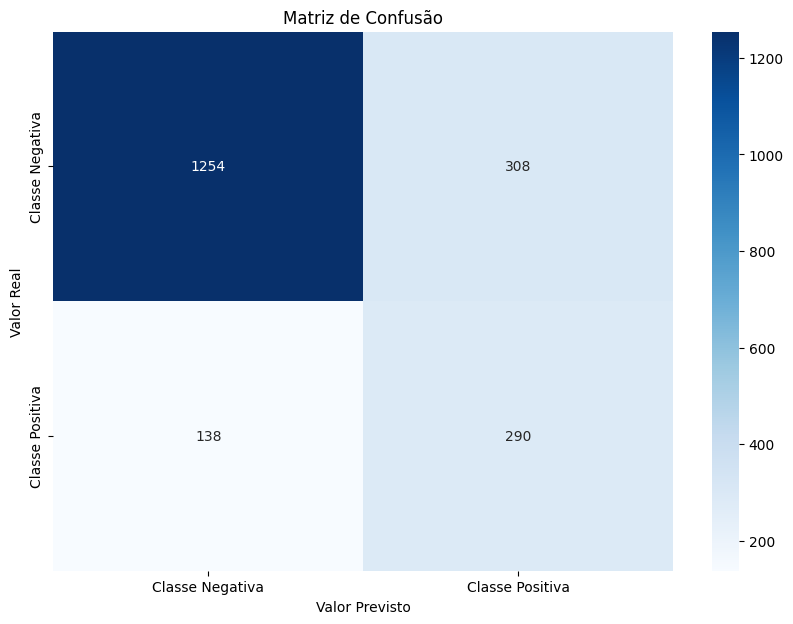

Relatório de Classificação:
               precision    recall  f1-score   support

    Classe 0       0.90      0.80      0.85      1562
    Classe 1       0.48      0.68      0.57       428

    accuracy                           0.78      1990
   macro avg       0.69      0.74      0.71      1990
weighted avg       0.81      0.78      0.79      1990



In [28]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Certifique-se de que X_test e Y_test tenham a forma correta
print(f"Forma de X_test: {X_test.shape}")
print(f"Forma de Y_test: {Y_test.shape}")

# Verifique se X_test não está vazio
if X_test.size == 0:
    raise ValueError("X_test está vazio")

# Realize a predição
previsoes = model.predict(X_test)

# Verifique a forma das previsões
print(f"Forma das previsões: {previsoes.shape}")

# Converta as previsões para binário
previsoes_binarias = [1 if x > 0.5 else 0 for x in previsoes]

# Avaliação da acurácia
acuracia = accuracy_score(Y_test, previsoes_binarias)
print(f"Acurácia no conjunto de teste: {acuracia}")

# Matriz de Confusão
matriz_confusao = confusion_matrix(Y_test, previsoes_binarias)
print("Matriz de Confusão:\n", matriz_confusao)

# Plot da Matriz de Confusão
plt.figure(figsize=(10, 7))
sns.heatmap(matriz_confusao, annot=True, fmt="d", cmap="Blues", xticklabels=["Classe Negativa", "Classe Positiva"], yticklabels=["Classe Negativa", "Classe Positiva"])
plt.title('Matriz de Confusão')
plt.ylabel('Valor Real')
plt.xlabel('Valor Previsto')
plt.show()

# Relatório de Classificação
relatorio_classificacao = classification_report(Y_test, previsoes_binarias, target_names=["Classe 0", "Classe 1"])
print("Relatório de Classificação:\n", relatorio_classificacao)


In [29]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

def train_model(model, X_train, Y_train, EPOCHS=30):
    # Usando 'val_accuracy' em vez de 'val_acc'
    early_stop = EarlyStopping(monitor='val_accuracy', patience=10,verbose=1,
                               mode='max', restore_best_weights=True)

    reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=5,
                                  verbose=1, mode='max', min_lr=1e-5)

    history = model.fit(X_train,
                        Y_train,
                        validation_split=0.2,
                        batch_size=16,
                        epochs=EPOCHS,
                        callbacks=[reduce_lr, early_stop])
    return history


melor fold = 1
OIBOMDIA 0
Epoch 1/30
  9/431 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.5464 - loss: 0.8757 

W0000 00:00:1722698956.635157     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6508 - loss: 0.7053

W0000 00:00:1722698974.969515     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722698981.204580     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722698989.212522     139 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


431/431 ━━━━━━━━━━━━━━━━━━━━ 55s 77ms/step - accuracy: 0.6509 - loss: 0.7052 - val_accuracy: 0.7404 - val_loss: 0.5306 - learning_rate: 0.0010
Epoch 2/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7173 - loss: 0.5568 - val_accuracy: 0.7346 - val_loss: 0.5422 - learning_rate: 0.0010
Epoch 3/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7513 - loss: 0.5128 - val_accuracy: 0.7276 - val_loss: 0.5363 - learning_rate: 0.0010
Epoch 4/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7655 - loss: 0.4895 - val_accuracy: 0.7271 - val_loss: 0.5348 - learning_rate: 0.0010
Epoch 5/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7762 - loss: 0.4738 - val_accuracy: 0.7352 - val_loss: 0.5294 - learning_rate: 0.0010
Epoch 6/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7873 - loss: 0.4594 - val_accuracy: 0.7625 - val_loss: 0.5180 - learning_rate: 0.0010
Epoch 7/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7875 - loss: 0.4497 - val

W0000 00:00:1722699093.950311     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 95ms/step


W0000 00:00:1722699099.840620     139 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Precisão : 0.6672439090228314
Recall : 0.7298350425407159
F1-Score : 0.6744843996588803
OIBOMDIA 1
Epoch 1/30
  9/431 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.5515 - loss: 0.8230 

W0000 00:00:1722699121.728249     139 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6474 - loss: 0.7010

W0000 00:00:1722699135.904725     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722699141.696767     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722699145.871881     139 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


431/431 ━━━━━━━━━━━━━━━━━━━━ 42s 57ms/step - accuracy: 0.6474 - loss: 0.7009 - val_accuracy: 0.7114 - val_loss: 0.5634 - learning_rate: 0.0010
Epoch 2/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.7202 - loss: 0.5477 - val_accuracy: 0.7230 - val_loss: 0.5418 - learning_rate: 0.0010
Epoch 3/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.7385 - loss: 0.5236 - val_accuracy: 0.7271 - val_loss: 0.5311 - learning_rate: 0.0010
Epoch 4/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7527 - loss: 0.5088 - val_accuracy: 0.7323 - val_loss: 0.5408 - learning_rate: 0.0010
Epoch 5/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.7663 - loss: 0.4761 - val_accuracy: 0.7340 - val_loss: 0.5303 - learning_rate: 0.0010
Epoch 6/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.7676 - loss: 0.4804 - val_accuracy: 0.7433 - val_loss: 0.5282 - learning_rate: 0.0010
Epoch 7/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7833 - loss: 0.4611 - val

W0000 00:00:1722699317.322284     139 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 96ms/step


W0000 00:00:1722699323.245300     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Precisão : 0.6726406036352066
Recall : 0.7321086672968995
F1-Score : 0.6827115898305709
OIBOMDIA 2
Epoch 1/30
  7/431 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.4196 - loss: 1.0540  

W0000 00:00:1722699345.263485     140 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6344 - loss: 0.7248

W0000 00:00:1722699359.200001     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722699365.000973     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722699369.075435     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


431/431 ━━━━━━━━━━━━━━━━━━━━ 42s 56ms/step - accuracy: 0.6345 - loss: 0.7246 - val_accuracy: 0.7218 - val_loss: 0.5552 - learning_rate: 0.0010
Epoch 2/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.7250 - loss: 0.5566 - val_accuracy: 0.7323 - val_loss: 0.5466 - learning_rate: 0.0010
Epoch 3/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.7306 - loss: 0.5380 - val_accuracy: 0.7352 - val_loss: 0.5308 - learning_rate: 0.0010
Epoch 4/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7645 - loss: 0.4959 - val_accuracy: 0.7329 - val_loss: 0.5360 - learning_rate: 0.0010
Epoch 5/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7808 - loss: 0.4750 - val_accuracy: 0.7456 - val_loss: 0.5328 - learning_rate: 0.0010
Epoch 6/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.7771 - loss: 0.4704 - val_accuracy: 0.7491 - val_loss: 0.5214 - learning_rate: 0.0010
Epoch 7/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7834 - loss: 0.4600 - va

W0000 00:00:1722699481.896411     139 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 94ms/step


W0000 00:00:1722699487.729981     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Precisão : 0.6844812305229151
Recall : 0.7412959062787943
F1-Score : 0.6974518486503853
OIBOMDIA 3
Epoch 1/30
  9/431 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.5394 - loss: 1.0328 

W0000 00:00:1722699509.846119     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6560 - loss: 0.7327

W0000 00:00:1722699523.722374     139 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722699529.525110     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722699533.700375     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


431/431 ━━━━━━━━━━━━━━━━━━━━ 42s 57ms/step - accuracy: 0.6560 - loss: 0.7326 - val_accuracy: 0.7137 - val_loss: 0.5545 - learning_rate: 0.0010
Epoch 2/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.7095 - loss: 0.5644 - val_accuracy: 0.7253 - val_loss: 0.5333 - learning_rate: 0.0010
Epoch 3/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7355 - loss: 0.5328 - val_accuracy: 0.7404 - val_loss: 0.5331 - learning_rate: 0.0010
Epoch 4/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7500 - loss: 0.5117 - val_accuracy: 0.7427 - val_loss: 0.5256 - learning_rate: 0.0010
Epoch 5/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7638 - loss: 0.4975 - val_accuracy: 0.7416 - val_loss: 0.5285 - learning_rate: 0.0010
Epoch 6/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.7834 - loss: 0.4673 - val_accuracy: 0.7503 - val_loss: 0.5155 - learning_rate: 0.0010
Epoch 7/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7720 - loss: 0.4690 - va

W0000 00:00:1722699646.912258     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 97ms/step


W0000 00:00:1722699652.914847     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Precisão : 0.6691414191914142
Recall : 0.7429068890830113
F1-Score : 0.6676043956043957
OIBOMDIA 4
Epoch 1/30
 10/431 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.5372 - loss: 0.8978  

W0000 00:00:1722699675.239936     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6497 - loss: 0.7127

W0000 00:00:1722699689.348958     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722699695.159422     139 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722699699.456311     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


431/431 ━━━━━━━━━━━━━━━━━━━━ 42s 57ms/step - accuracy: 0.6498 - loss: 0.7126 - val_accuracy: 0.7172 - val_loss: 0.5731 - learning_rate: 0.0010
Epoch 2/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.7161 - loss: 0.5701 - val_accuracy: 0.7067 - val_loss: 0.5611 - learning_rate: 0.0010
Epoch 3/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.7554 - loss: 0.5129 - val_accuracy: 0.7300 - val_loss: 0.5342 - learning_rate: 0.0010
Epoch 4/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.7497 - loss: 0.5070 - val_accuracy: 0.7358 - val_loss: 0.5347 - learning_rate: 0.0010
Epoch 5/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7554 - loss: 0.4913 - val_accuracy: 0.7346 - val_loss: 0.5271 - learning_rate: 0.0010
Epoch 6/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7785 - loss: 0.4684 - val_accuracy: 0.7247 - val_loss: 0.5421 - learning_rate: 0.0010
Epoch 7/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.7841 - loss: 0.4599 - va

W0000 00:00:1722699832.135145     140 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 95ms/step


W0000 00:00:1722699838.054744     140 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Precisão : 0.6732487956325099
Recall : 0.7373888616319839
F1-Score : 0.6815930573841302
OIBOMDIA 5
Epoch 1/30
 10/431 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.5494 - loss: 0.9176  

W0000 00:00:1722699860.424372     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6403 - loss: 0.7006

W0000 00:00:1722699874.577058     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722699880.461132     140 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722699884.643678     139 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


431/431 ━━━━━━━━━━━━━━━━━━━━ 42s 57ms/step - accuracy: 0.6403 - loss: 0.7005 - val_accuracy: 0.6951 - val_loss: 0.5634 - learning_rate: 0.0010
Epoch 2/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.7097 - loss: 0.5712 - val_accuracy: 0.7369 - val_loss: 0.5458 - learning_rate: 0.0010
Epoch 3/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7378 - loss: 0.5163 - val_accuracy: 0.7439 - val_loss: 0.5195 - learning_rate: 0.0010
Epoch 4/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7556 - loss: 0.5030 - val_accuracy: 0.7253 - val_loss: 0.5505 - learning_rate: 0.0010
Epoch 5/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7628 - loss: 0.4935 - val_accuracy: 0.7398 - val_loss: 0.5255 - learning_rate: 0.0010
Epoch 6/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7734 - loss: 0.4674 - val_accuracy: 0.7410 - val_loss: 0.5439 - learning_rate: 0.0010
Epoch 7/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7754 - loss: 0.4696 - val

W0000 00:00:1722699974.014577     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 95ms/step


W0000 00:00:1722699979.890414     139 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Precisão : 0.6761690648516954
Recall : 0.7289734584225831
F1-Score : 0.6883929071768803
OIBOMDIA 6
Epoch 1/30
 10/431 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.5544 - loss: 0.8263 

W0000 00:00:1722700002.212117     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6481 - loss: 0.7069

W0000 00:00:1722700016.279054     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722700022.085348     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722700026.200609     139 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


431/431 ━━━━━━━━━━━━━━━━━━━━ 42s 57ms/step - accuracy: 0.6481 - loss: 0.7068 - val_accuracy: 0.7288 - val_loss: 0.5534 - learning_rate: 0.0010
Epoch 2/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.7057 - loss: 0.5596 - val_accuracy: 0.7381 - val_loss: 0.5304 - learning_rate: 0.0010
Epoch 3/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7435 - loss: 0.5274 - val_accuracy: 0.7137 - val_loss: 0.5506 - learning_rate: 0.0010
Epoch 4/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.7502 - loss: 0.4959 - val_accuracy: 0.7509 - val_loss: 0.5158 - learning_rate: 0.0010
Epoch 5/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7534 - loss: 0.4912 - val_accuracy: 0.7462 - val_loss: 0.5206 - learning_rate: 0.0010
Epoch 6/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.7785 - loss: 0.4689 - val_accuracy: 0.7584 - val_loss: 0.5139 - learning_rate: 0.0010
Epoch 7/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.7775 - loss: 0.4620 - val

W0000 00:00:1722700131.958309     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 96ms/step


W0000 00:00:1722700137.880751     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Precisão : 0.6780188718742539
Recall : 0.7353261454880515
F1-Score : 0.6897950485210035
OIBOMDIA 7
Epoch 1/30
  9/431 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.5521 - loss: 0.8655 

W0000 00:00:1722700160.652035     139 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6408 - loss: 0.7107

W0000 00:00:1722700175.056868     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722700180.914044     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722700185.128767     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


431/431 ━━━━━━━━━━━━━━━━━━━━ 42s 58ms/step - accuracy: 0.6409 - loss: 0.7105 - val_accuracy: 0.7120 - val_loss: 0.5617 - learning_rate: 0.0010
Epoch 2/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.7201 - loss: 0.5536 - val_accuracy: 0.7271 - val_loss: 0.5501 - learning_rate: 0.0010
Epoch 3/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7540 - loss: 0.5187 - val_accuracy: 0.7433 - val_loss: 0.5213 - learning_rate: 0.0010
Epoch 4/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.7590 - loss: 0.5014 - val_accuracy: 0.7236 - val_loss: 0.5453 - learning_rate: 0.0010
Epoch 5/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7711 - loss: 0.4782 - val_accuracy: 0.7207 - val_loss: 0.5393 - learning_rate: 0.0010
Epoch 6/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7764 - loss: 0.4685 - val_accuracy: 0.7340 - val_loss: 0.5324 - learning_rate: 0.0010
Epoch 7/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7746 - loss: 0.4692 - va

W0000 00:00:1722700316.787719     140 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 95ms/step


W0000 00:00:1722700322.684508     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Precisão : 0.6791524265208476
Recall : 0.73523041391937
F1-Score : 0.6913646163859735
OIBOMDIA 8
Epoch 1/30
  9/431 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.4346 - loss: 1.0207 

W0000 00:00:1722700345.414147     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6477 - loss: 0.6978

W0000 00:00:1722700359.421702     139 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722700365.191819     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722700369.465252     139 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


431/431 ━━━━━━━━━━━━━━━━━━━━ 42s 57ms/step - accuracy: 0.6477 - loss: 0.6976 - val_accuracy: 0.7149 - val_loss: 0.5561 - learning_rate: 0.0010
Epoch 2/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.7275 - loss: 0.5590 - val_accuracy: 0.7387 - val_loss: 0.5446 - learning_rate: 0.0010
Epoch 3/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.7377 - loss: 0.5197 - val_accuracy: 0.7404 - val_loss: 0.5201 - learning_rate: 0.0010
Epoch 4/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7572 - loss: 0.4964 - val_accuracy: 0.7276 - val_loss: 0.5567 - learning_rate: 0.0010
Epoch 5/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7675 - loss: 0.4807 - val_accuracy: 0.7364 - val_loss: 0.5283 - learning_rate: 0.0010
Epoch 6/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7767 - loss: 0.4773 - val_accuracy: 0.7340 - val_loss: 0.5451 - learning_rate: 0.0010
Epoch 7/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.7770 - loss: 0.4617 - val

W0000 00:00:1722700482.017364     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 96ms/step


W0000 00:00:1722700487.942333     140 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Precisão : 0.6731178106089517
Recall : 0.7279966972608805
F1-Score : 0.6844971741093624
OIBOMDIA 9
Epoch 1/30
 10/431 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.4873 - loss: 0.9315  

W0000 00:00:1722700510.780074     140 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6367 - loss: 0.7118

W0000 00:00:1722700524.536244     140 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722700530.251929     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722700534.410497     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


431/431 ━━━━━━━━━━━━━━━━━━━━ 41s 56ms/step - accuracy: 0.6368 - loss: 0.7116 - val_accuracy: 0.7271 - val_loss: 0.5607 - learning_rate: 0.0010
Epoch 2/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7233 - loss: 0.5588 - val_accuracy: 0.7358 - val_loss: 0.5444 - learning_rate: 0.0010
Epoch 3/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7445 - loss: 0.5256 - val_accuracy: 0.7398 - val_loss: 0.5279 - learning_rate: 0.0010
Epoch 4/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.7566 - loss: 0.4950 - val_accuracy: 0.7387 - val_loss: 0.5314 - learning_rate: 0.0010
Epoch 5/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.7740 - loss: 0.4745 - val_accuracy: 0.7323 - val_loss: 0.5278 - learning_rate: 0.0010
Epoch 6/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7717 - loss: 0.4722 - val_accuracy: 0.7329 - val_loss: 0.5572 - learning_rate: 0.0010
Epoch 7/30
431/431 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7865 - loss: 0.4608 - val

W0000 00:00:1722700645.204870     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 94ms/step


W0000 00:00:1722700651.057847     139 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Precisão : 0.6728457821142965
Recall : 0.744124474972178
F1-Score : 0.6762671638400675
Acurácia média: 0.7423115577889448 ± 0.014077169920186155
Precisão média: 0.6746059913974923 ± 0.004768237896272034
Recall médio: 0.7355186556894467 ± 0.005558700400858642
F1-Score médio: 0.683416220116165 ± 0.008435175409939178


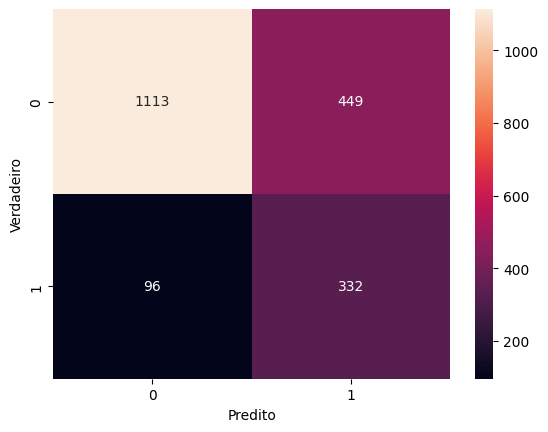

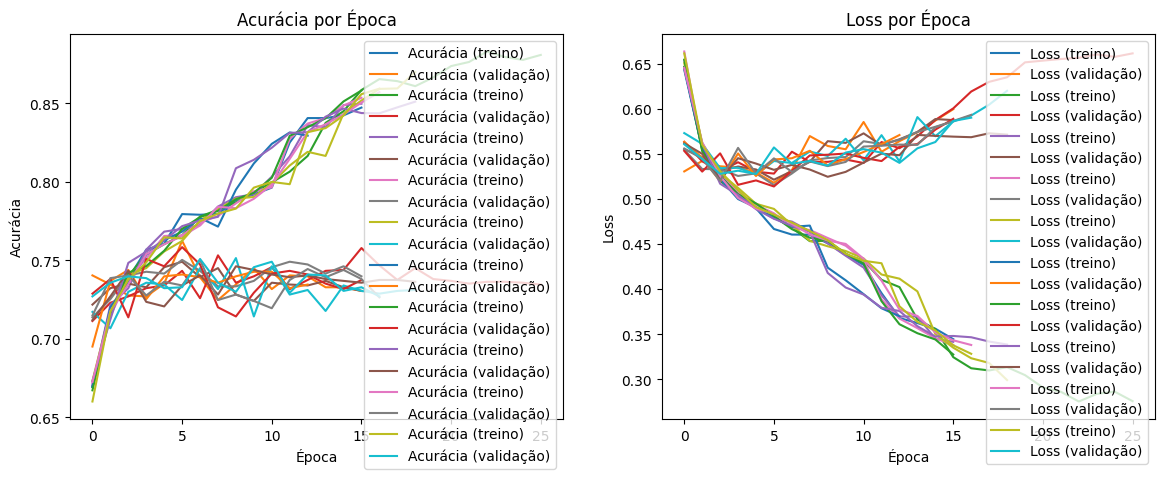

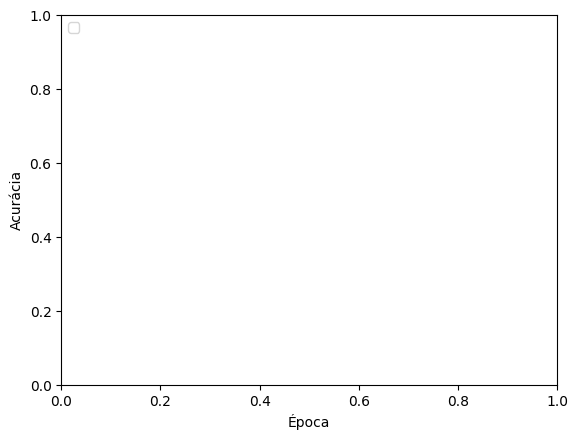

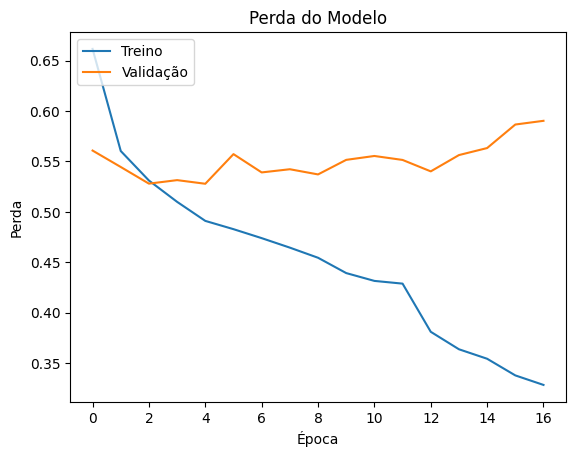

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np  # Importe a biblioteca NumPy

# Listas para armazenar as métricas de cada iteração
accuracies = []
precisions = []
recalls = []
f1_scores = []
historys = []
if(bf==0):
    treinox = x_train_1
    treinoy = y_train_1
    print("melor fold = 1")
elif(bf==1):
    treinox = x_train_2
    treinoy = y_train_2
    print("melor fold = 2")
else:
    treinox = x_train_3
    treinoy = y_train_3
    print("melor fold = 3")

for i in range(10):
    print("OIBOMDIA",i)
    tf.keras.backend.clear_session()
    model = create_InceptionV3()
    historys.append(train_model(model, treinox, treinoy, 30))

    previsoes = model.predict(X_test)
    previsoes_binarias = [1 if x > 0.5 else 0 for x in previsoes]

    # Adiciona a acurácia à lista
    acuracia = accuracy_score(Y_test, previsoes_binarias)
    accuracies.append(acuracia)

    # Calcula e adiciona precisão, recall e f1-score à suas respectivas listas
    relatorio_classificacao = classification_report(Y_test, previsoes_binarias, target_names=["Classe 0", "Classe 1"], output_dict=True)
    # Capturando os valores individuais de precisão, recall e F1-score para a classe '1'
    precisao_classe_1 = relatorio_classificacao['macro avg']['precision']
    recall_classe_1 = relatorio_classificacao['macro avg']['recall']
    f1_score_classe_1 = relatorio_classificacao['macro avg']['f1-score']

    print(f"Precisão : {precisao_classe_1}")
    print(f"Recall : {recall_classe_1}")
    print(f"F1-Score : {f1_score_classe_1}")

    precisions.append(precisao_classe_1)
    recalls.append(recall_classe_1)
    f1_scores.append(f1_score_classe_1)


# Calcula a média de cada métrica
acuracia_media = np.mean(accuracies)
precisao_media = np.mean(precisions)
recall_medio = np.mean(recalls)
f1_score_medio = np.mean(f1_scores)

# Calcula o desvio padrão de cada métrica
acuracia_dp = np.std(accuracies)
precisao_dp = np.std(precisions)
recall_dp = np.std(recalls)
f1_score_dp = np.std(f1_scores)

# Exibe os resultados
print(f"Acurácia média: {acuracia_media} ± {acuracia_dp}")
print(f"Precisão média: {precisao_media} ± {precisao_dp}")
print(f"Recall médio: {recall_medio} ± {recall_dp}")
print(f"F1-Score médio: {f1_score_medio} ± {f1_score_dp}")

# Opção para plotar a matriz de confusão da última iteração
cm = confusion_matrix(Y_test, previsoes_binarias)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()

import matplotlib.pyplot as plt

# Configuração do gráfico de Acurácia
plt.figure(figsize=(14, 5))

# Gráfico de Acurácia por Época para cada history
plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, posição 1
for history in historys:
    plt.plot(history.history['accuracy'], label='Acurácia (treino)')
    plt.plot(history.history['val_accuracy'], label='Acurácia (validação)')
plt.title('Acurácia por Época')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

# Configuração do gráfico de Loss
plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, posição 2
for history in historys:
    plt.plot(history.history['loss'], label='Loss (treino)')
    plt.plot(history.history['val_loss'], label='Loss (validação)')
plt.title('Loss por Época')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(['Treino', 'Validação'], loc='upper left')
plt.show()

# Sumarize o histórico de perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perda do Modelo')
plt.ylabel('Perda')
plt.xlabel('Época')
plt.legend(['Treino', 'Validação'], loc='upper left')
plt.show()